# Human Stress Detection in and through Sleep
Human Stress Detection in and through Sleep by monitoring physiological data.

# About Dataset
Considering today’s lifestyle, people just sleep forgetting the benefits sleep provides to the human body. Smart-Yoga Pillow (SaYoPillow) is proposed to help in understanding the relationship between stress and sleep and to fully materialize the idea of “Smart-Sleeping” by proposing an edge device. An edge processor with a model analyzing the physiological changes that occur during sleep along with the sleeping habits is proposed. Based on these changes during sleep, stress prediction for the following day is proposed. The secure transfer of the analyzed stress data along with the average physiological changes to the IoT cloud for storage is implemented. A secure transfer of any data from the cloud to any third-party applications is also proposed. A user interface is provided allowing the user to control the data accessibility and visibility. SaYoPillow is novel, with security features as well as consideration of sleeping habits for stress reduction, with an accuracy of up to 96%.
In SayoPillow.csv, you will see the relationship between the parameters- snoring range of the user, respiration rate, body temperature, limb movement rate, blood oxygen levels, eye movement, number of hours of sleep, heart rate and Stress Levels (0- low/normal, 1 – medium low, 2- medium, 3-medium high, 4 -high) that has been generated from Literature Review. (No human subjects were considered)

# Citations

    L. Rachakonda, A. K. Bapatla, S. P. Mohanty, and E. Kougianos, “SaYoPillow: Blockchain-Integrated Privacy-Assured IoMT Framework for Stress Management Considering Sleeping Habits”, IEEE Transactions on Consumer Electronics (TCE), Vol. 67, No. 1, Feb 2021, pp. 20-29.
    L. Rachakonda, S. P. Mohanty, E. Kougianos, K. Karunakaran, and M. Ganapathiraju, “Smart-Pillow: An IoT based Device for Stress Detection Considering Sleeping Habits”, in Proceedings of the 4th IEEE International Symposium on Smart Electronic Systems (iSES), 2018, pp. 161--166.

In [20]:
# import libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
# read the data

df = pd.read_csv('SaYoPillow.csv')

In [95]:
df.shape

(630, 9)

In [5]:
df.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


# Attribute Information

    sr - snoring range of the user
    rr - respiration rate
    t - body temperature
    lm - limb movement rate
    bo - blood oxygen levels
    rem - eye movement
    sr.1 - number of hours of sleep
    hr - heart rate
    sl - Stress Levels (0- low/normal, 1 – medium low, 2- medium, 3-medium high, 4 -high)

In [6]:
# renaming

df.columns=['snoring_rate', 'respiration_rate', 'body_temperature', 'limb_movement', 'blood_oxygen', \
             'eye_movement', 'sleeping_hours', 'heart_rate', 'stress_level']

In [7]:
df.head()

,snoring_rate,respiration_rate,body_temperature,limb_movement,blood_oxygen,eye_movement,sleeping_hours,heart_rate,stress_level
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
snoring_rate,630.0,71.6,19.372833,45.0,52.50,70.0,91.25,100.0
respiration_rate,630.0,21.8,3.966111,16.0,18.50,21.0,25.00,30.0
body_temperature,630.0,92.8,3.529690,85.0,90.50,93.0,95.50,99.0
limb_movement,630.0,11.7,4.299629,4.0,8.50,11.0,15.75,19.0
blood_oxygen,630.0,90.9,3.902483,82.0,88.50,91.0,94.25,97.0
eye_movement,630.0,88.5,11.893747,60.0,81.25,90.0,98.75,105.0
sleeping_hours,630.0,3.7,3.054572,0.0,0.50,3.5,6.50,9.0
heart_rate,630.0,64.5,9.915277,50.0,56.25,62.5,72.50,85.0
stress_level,630.0,2.0,1.415337,0.0,1.00,2.0,3.00,4.0


In [11]:
df.isnull().sum()

snoring_rate        0
respiration_rate    0
body_temperature    0
limb_movement       0
blood_oxygen        0
eye_movement        0
sleeping_hours      0
heart_rate          0
stress_level        0
dtype: int64

In [12]:
df["stress_level"].value_counts()

3    126
1    126
0    126
2    126
4    126
Name: stress_level, dtype: int64

<AxesSubplot:xlabel='stress_level', ylabel='count'>

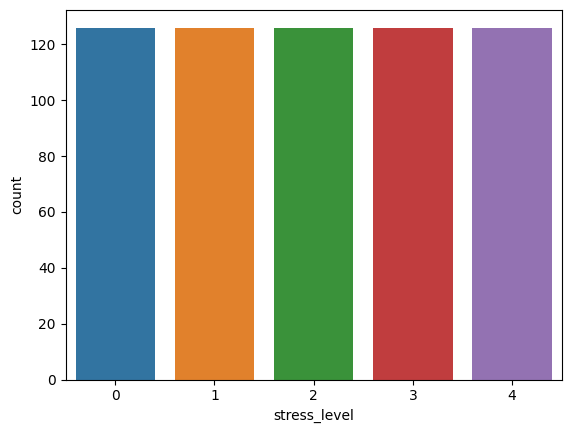

In [13]:
sns.countplot(data = df, x = "stress_level")

In [14]:
df.groupby('stress_level').mean()

,snoring_rate,respiration_rate,body_temperature,limb_movement,blood_oxygen,eye_movement,sleeping_hours,heart_rate
stress_level,,,,,,,,
0,47.5,17.0,97.5,6.0,96.0,70.0,8.0,52.5
1,55.0,19.0,95.0,9.0,93.5,82.5,6.0,57.5
2,70.0,21.0,93.0,11.0,91.0,90.0,3.5,62.5
3,87.5,24.0,91.0,14.5,89.0,97.5,1.0,70.0
4,98.0,28.0,87.5,18.0,85.0,102.5,0.0,80.0


In [17]:
df.groupby('stress_level').var()

,snoring_rate,respiration_rate,body_temperature,limb_movement,blood_oxygen,eye_movement,sleeping_hours,heart_rate
stress_level,,,,,,,,
0,2.133600,0.341376,0.768096,1.365504,0.341376,34.1376,0.341376,2.1336
1,8.534400,0.341376,0.341376,0.341376,0.768096,2.1336,0.341376,2.1336
2,34.137600,0.341376,0.341376,0.341376,0.341376,8.5344,0.768096,2.1336
3,19.202400,1.365504,0.341376,2.133600,0.341376,2.1336,0.341376,8.5344
4,1.365504,1.365504,2.133600,0.341376,3.072384,2.1336,0.000000,8.5344


In [19]:
# Compute pairwise correlation of column

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,snoring_rate,respiration_rate,body_temperature,limb_movement,blood_oxygen,eye_movement,sleeping_hours,heart_rate,stress_level
snoring_rate,1.000000,0.976268,-0.902475,0.981078,-0.903140,0.950600,-0.920554,0.976268,0.975322
respiration_rate,0.976268,1.000000,-0.889237,0.991738,-0.889210,0.935572,-0.891855,1.000000,0.963516
body_temperature,-0.902475,-0.889237,1.000000,-0.896412,0.998108,-0.857299,0.954860,-0.889237,-0.962354
limb_movement,0.981078,0.991738,-0.896412,1.000000,-0.898527,0.964703,-0.901102,0.991738,0.971071
blood_oxygen,-0.903140,-0.889210,0.998108,-0.898527,1.000000,-0.862136,0.950189,-0.889210,-0.961092
eye_movement,0.950600,0.935572,-0.857299,0.964703,-0.862136,1.000000,-0.893952,0.935572,0.951988
sleeping_hours,-0.920554,-0.891855,0.954860,-0.901102,0.950189,-0.893952,1.000000,-0.891855,-0.973036
heart_rate,0.976268,1.000000,-0.889237,0.991738,-0.889210,0.935572,-0.891855,1.000000,0.963516
stress_level,0.975322,0.963516,-0.962354,0.971071,-0.961092,0.951988,-0.973036,0.963516,1.000000


In [38]:

def comparisonplot(data, column1, column2, target):
    figure = px.scatter(data_frame = data, x=column1,
                    y=column2, color= target)
    # figure.show()

    return figure

In [39]:
cols = []
figure=[]
for col1 in df.columns:
    cols.append(col1)
    for col2 in df.columns:
        if col2 not in cols:
            fig =comparisonplot(df,col1, col2, 'stress_level')
            figure.append(fig)
            # Save the figures
            



In [58]:
# Plotting the figures
figure[0]


ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


In [55]:
figure[1]

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': ('snoring_rate=%{x}<br>body_temp' ... '%{marker.color}<extra></extra>'),
              'legendgroup': '',
              'marker': {'color': array([3, 3, 1, ..., 4, 1, 2], dtype=int64),
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([93.8  , 91.64 , 60.   , ..., 97.504, 58.64 , 73.92 ]),
              'xaxis': 'x',
              'y': array([91.84 , 91.552, 96.   , ..., 86.88 , 95.728, 93.392]),
              'yaxis': 'y'}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'stress_level'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'snoring_rate'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'body_temperature'}}}
})

In [57]:
figure[2]

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': ('snoring_rate=%{x}<br>limb_move' ... '%{marker.color}<extra></extra>'),
              'legendgroup': '',
              'marker': {'color': array([3, 3, 1, ..., 4, 1, 2], dtype=int64),
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([93.8  , 91.64 , 60.   , ..., 97.504, 58.64 , 73.92 ]),
              'xaxis': 'x',
              'y': array([16.6  , 15.88 , 10.   , ..., 17.752,  9.728, 11.392]),
              'yaxis': 'y'}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'stress_level'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'snoring_rate'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'limb_movement'}}}
})

In [56]:
figure[3]

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': ('snoring_rate=%{x}<br>blood_oxy' ... '%{marker.color}<extra></extra>'),
              'legendgroup': '',
              'marker': {'color': array([3, 3, 1, ..., 4, 1, 2], dtype=int64),
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([93.8  , 91.64 , 60.   , ..., 97.504, 58.64 , 73.92 ]),
              'xaxis': 'x',
              'y': array([89.84 , 89.552, 95.   , ..., 84.256, 94.592, 91.392]),
              'yaxis': 'y'}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'stress_level'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'snoring_rate'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'blood_oxygen'}}}
})

In [59]:
figure[4]

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': ('snoring_rate=%{x}<br>eye_movem' ... '%{marker.color}<extra></extra>'),
              'legendgroup': '',
              'marker': {'color': array([3, 3, 1, ..., 4, 1, 2], dtype=int64),
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([93.8  , 91.64 , 60.   , ..., 97.504, 58.64 , 73.92 ]),
              'xaxis': 'x',
              'y': array([ 99.6 ,  98.88,  85.  , ..., 101.88,  84.32,  91.96]),
              'yaxis': 'y'}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'stress_level'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'snoring_rate'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'eye_movement'}}}
})

In [60]:
figure[5]

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': ('snoring_rate=%{x}<br>sleeping_' ... '%{marker.color}<extra></extra>'),
              'legendgroup': '',
              'marker': {'color': array([3, 3, 1, ..., 4, 1, 2], dtype=int64),
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([93.8  , 91.64 , 60.   , ..., 97.504, 58.64 , 73.92 ]),
              'xaxis': 'x',
              'y': array([1.84 , 1.552, 7.   , ..., 0.   , 6.728, 4.088]),
              'yaxis': 'y'}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'stress_level'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'snoring_rate'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'sleeping_hours'}}}
})

In [61]:
figure[6]

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': ('snoring_rate=%{x}<br>heart_rat' ... '%{marker.color}<extra></extra>'),
              'legendgroup': '',
              'marker': {'color': array([3, 3, 1, ..., 4, 1, 2], dtype=int64),
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([93.8  , 91.64 , 60.   , ..., 97.504, 58.64 , 73.92 ]),
              'xaxis': 'x',
              'y': array([74.2 , 72.76, 60.  , ..., 78.76, 59.32, 63.48]),
              'yaxis': 'y'}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'stress_level'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'snoring_rate'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'heart_rate'}}}
})

In [64]:
figure[7]

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'snoring_rate=%{x}<br>stress_level=%{marker.color}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': array([3, 3, 1, ..., 4, 1, 2], dtype=int64),
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([93.8  , 91.64 , 60.   , ..., 97.504, 58.64 , 73.92 ]),
              'xaxis': 'x',
              'y': array([3, 3, 1, ..., 4, 1, 2], dtype=int64),
              'yaxis': 'y'}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'stress_level'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'snoring_rate'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'stress_level'}}}
})

In [65]:
figure[8]

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': ('respiration_rate=%{x}<br>body_' ... '%{marker.color}<extra></extra>'),
              'legendgroup': '',
              'marker': {'color': array([3, 3, 1, ..., 4, 1, 2], dtype=int64),
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([25.68 , 25.104, 20.   , ..., 27.504, 19.728, 21.392]),
              'xaxis': 'x',
              'y': array([91.84 , 91.552, 96.   , ..., 86.88 , 95.728, 93.392]),
              'yaxis': 'y'}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'stress_level'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'respiration_rate'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'body_temperature'}}}
})

In [66]:
figure[9]

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': ('respiration_rate=%{x}<br>limb_' ... '%{marker.color}<extra></extra>'),
              'legendgroup': '',
              'marker': {'color': array([3, 3, 1, ..., 4, 1, 2], dtype=int64),
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([25.68 , 25.104, 20.   , ..., 27.504, 19.728, 21.392]),
              'xaxis': 'x',
              'y': array([16.6  , 15.88 , 10.   , ..., 17.752,  9.728, 11.392]),
              'yaxis': 'y'}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'stress_level'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'respiration_rate'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'limb_movement'}}}
})

In [67]:
figure[10]

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': ('respiration_rate=%{x}<br>blood' ... '%{marker.color}<extra></extra>'),
              'legendgroup': '',
              'marker': {'color': array([3, 3, 1, ..., 4, 1, 2], dtype=int64),
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([25.68 , 25.104, 20.   , ..., 27.504, 19.728, 21.392]),
              'xaxis': 'x',
              'y': array([89.84 , 89.552, 95.   , ..., 84.256, 94.592, 91.392]),
              'yaxis': 'y'}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'stress_level'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'respiration_rate'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'blood_oxygen'}}}
})

In [68]:
figure[11]

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': ('respiration_rate=%{x}<br>eye_m' ... '%{marker.color}<extra></extra>'),
              'legendgroup': '',
              'marker': {'color': array([3, 3, 1, ..., 4, 1, 2], dtype=int64),
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([25.68 , 25.104, 20.   , ..., 27.504, 19.728, 21.392]),
              'xaxis': 'x',
              'y': array([ 99.6 ,  98.88,  85.  , ..., 101.88,  84.32,  91.96]),
              'yaxis': 'y'}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'stress_level'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'respiration_rate'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'eye_movement'}}}
})

In [69]:
figure[12]

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': ('respiration_rate=%{x}<br>sleep' ... '%{marker.color}<extra></extra>'),
              'legendgroup': '',
              'marker': {'color': array([3, 3, 1, ..., 4, 1, 2], dtype=int64),
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([25.68 , 25.104, 20.   , ..., 27.504, 19.728, 21.392]),
              'xaxis': 'x',
              'y': array([1.84 , 1.552, 7.   , ..., 0.   , 6.728, 4.088]),
              'yaxis': 'y'}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'stress_level'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'respiration_rate'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'sleeping_hours'}}}
})

In [70]:
figure[13]

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': ('respiration_rate=%{x}<br>heart' ... '%{marker.color}<extra></extra>'),
              'legendgroup': '',
              'marker': {'color': array([3, 3, 1, ..., 4, 1, 2], dtype=int64),
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([25.68 , 25.104, 20.   , ..., 27.504, 19.728, 21.392]),
              'xaxis': 'x',
              'y': array([74.2 , 72.76, 60.  , ..., 78.76, 59.32, 63.48]),
              'yaxis': 'y'}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'stress_level'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'respiration_rate'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'heart_rate'}}}
})

In [71]:
figure[14]

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'respiration_rate=%{x}<br>stress_level=%{marker.color}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': array([3, 3, 1, ..., 4, 1, 2], dtype=int64),
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([25.68 , 25.104, 20.   , ..., 27.504, 19.728, 21.392]),
              'xaxis': 'x',
              'y': array([3, 3, 1, ..., 4, 1, 2], dtype=int64),
              'yaxis': 'y'}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'stress_level'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'respiration_rate'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'stress_level'}}}
})

In [72]:
figure[15]

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': ('body_temperature=%{x}<br>limb_' ... '%{marker.color}<extra></extra>'),
              'legendgroup': '',
              'marker': {'color': array([3, 3, 1, ..., 4, 1, 2], dtype=int64),
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([91.84 , 91.552, 96.   , ..., 86.88 , 95.728, 93.392]),
              'xaxis': 'x',
              'y': array([16.6  , 15.88 , 10.   , ..., 17.752,  9.728, 11.392]),
              'yaxis': 'y'}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'stress_level'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'body_temperature'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'limb_movement'}}}
})

In [73]:
figure[16]

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': ('body_temperature=%{x}<br>blood' ... '%{marker.color}<extra></extra>'),
              'legendgroup': '',
              'marker': {'color': array([3, 3, 1, ..., 4, 1, 2], dtype=int64),
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([91.84 , 91.552, 96.   , ..., 86.88 , 95.728, 93.392]),
              'xaxis': 'x',
              'y': array([89.84 , 89.552, 95.   , ..., 84.256, 94.592, 91.392]),
              'yaxis': 'y'}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'stress_level'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'body_temperature'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'blood_oxygen'}}}
})

In [74]:
figure[17]

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': ('body_temperature=%{x}<br>eye_m' ... '%{marker.color}<extra></extra>'),
              'legendgroup': '',
              'marker': {'color': array([3, 3, 1, ..., 4, 1, 2], dtype=int64),
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([91.84 , 91.552, 96.   , ..., 86.88 , 95.728, 93.392]),
              'xaxis': 'x',
              'y': array([ 99.6 ,  98.88,  85.  , ..., 101.88,  84.32,  91.96]),
              'yaxis': 'y'}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'stress_level'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'body_temperature'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'eye_movement'}}}
})

In [75]:
figure[18]

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': ('body_temperature=%{x}<br>sleep' ... '%{marker.color}<extra></extra>'),
              'legendgroup': '',
              'marker': {'color': array([3, 3, 1, ..., 4, 1, 2], dtype=int64),
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([91.84 , 91.552, 96.   , ..., 86.88 , 95.728, 93.392]),
              'xaxis': 'x',
              'y': array([1.84 , 1.552, 7.   , ..., 0.   , 6.728, 4.088]),
              'yaxis': 'y'}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'stress_level'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'body_temperature'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'sleeping_hours'}}}
})

In [76]:
figure[19]

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': ('body_temperature=%{x}<br>heart' ... '%{marker.color}<extra></extra>'),
              'legendgroup': '',
              'marker': {'color': array([3, 3, 1, ..., 4, 1, 2], dtype=int64),
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([91.84 , 91.552, 96.   , ..., 86.88 , 95.728, 93.392]),
              'xaxis': 'x',
              'y': array([74.2 , 72.76, 60.  , ..., 78.76, 59.32, 63.48]),
              'yaxis': 'y'}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'stress_level'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'body_temperature'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'heart_rate'}}}
})

In [77]:
figure[20]

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'body_temperature=%{x}<br>stress_level=%{marker.color}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': array([3, 3, 1, ..., 4, 1, 2], dtype=int64),
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([91.84 , 91.552, 96.   , ..., 86.88 , 95.728, 93.392]),
              'xaxis': 'x',
              'y': array([3, 3, 1, ..., 4, 1, 2], dtype=int64),
              'yaxis': 'y'}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'stress_level'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'body_temperature'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'stress_level'}}}
})

In [78]:
figure[21]


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': ('limb_movement=%{x}<br>blood_ox' ... '%{marker.color}<extra></extra>'),
              'legendgroup': '',
              'marker': {'color': array([3, 3, 1, ..., 4, 1, 2], dtype=int64),
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([16.6  , 15.88 , 10.   , ..., 17.752,  9.728, 11.392]),
              'xaxis': 'x',
              'y': array([89.84 , 89.552, 95.   , ..., 84.256, 94.592, 91.392]),
              'yaxis': 'y'}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'stress_level'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'limb_movement'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'blood_oxygen'}}}
})

In [79]:
figure[22]


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': ('limb_movement=%{x}<br>eye_move' ... '%{marker.color}<extra></extra>'),
              'legendgroup': '',
              'marker': {'color': array([3, 3, 1, ..., 4, 1, 2], dtype=int64),
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([16.6  , 15.88 , 10.   , ..., 17.752,  9.728, 11.392]),
              'xaxis': 'x',
              'y': array([ 99.6 ,  98.88,  85.  , ..., 101.88,  84.32,  91.96]),
              'yaxis': 'y'}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'stress_level'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'limb_movement'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'eye_movement'}}}
})

In [80]:
figure[23]


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': ('limb_movement=%{x}<br>sleeping' ... '%{marker.color}<extra></extra>'),
              'legendgroup': '',
              'marker': {'color': array([3, 3, 1, ..., 4, 1, 2], dtype=int64),
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([16.6  , 15.88 , 10.   , ..., 17.752,  9.728, 11.392]),
              'xaxis': 'x',
              'y': array([1.84 , 1.552, 7.   , ..., 0.   , 6.728, 4.088]),
              'yaxis': 'y'}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'stress_level'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'limb_movement'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'sleeping_hours'}}}
})

In [81]:
figure[24]


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': ('limb_movement=%{x}<br>heart_ra' ... '%{marker.color}<extra></extra>'),
              'legendgroup': '',
              'marker': {'color': array([3, 3, 1, ..., 4, 1, 2], dtype=int64),
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([16.6  , 15.88 , 10.   , ..., 17.752,  9.728, 11.392]),
              'xaxis': 'x',
              'y': array([74.2 , 72.76, 60.  , ..., 78.76, 59.32, 63.48]),
              'yaxis': 'y'}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'stress_level'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'limb_movement'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'heart_rate'}}}
})

In [82]:
figure[25]


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'limb_movement=%{x}<br>stress_level=%{marker.color}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': array([3, 3, 1, ..., 4, 1, 2], dtype=int64),
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([16.6  , 15.88 , 10.   , ..., 17.752,  9.728, 11.392]),
              'xaxis': 'x',
              'y': array([3, 3, 1, ..., 4, 1, 2], dtype=int64),
              'yaxis': 'y'}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'stress_level'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'limb_movement'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'stress_level'}}}
})

In [83]:
figure[26]


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': ('blood_oxygen=%{x}<br>eye_movem' ... '%{marker.color}<extra></extra>'),
              'legendgroup': '',
              'marker': {'color': array([3, 3, 1, ..., 4, 1, 2], dtype=int64),
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([89.84 , 89.552, 95.   , ..., 84.256, 94.592, 91.392]),
              'xaxis': 'x',
              'y': array([ 99.6 ,  98.88,  85.  , ..., 101.88,  84.32,  91.96]),
              'yaxis': 'y'}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'stress_level'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'blood_oxygen'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'eye_movement'}}}
})

In [84]:
figure[27]


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': ('blood_oxygen=%{x}<br>sleeping_' ... '%{marker.color}<extra></extra>'),
              'legendgroup': '',
              'marker': {'color': array([3, 3, 1, ..., 4, 1, 2], dtype=int64),
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([89.84 , 89.552, 95.   , ..., 84.256, 94.592, 91.392]),
              'xaxis': 'x',
              'y': array([1.84 , 1.552, 7.   , ..., 0.   , 6.728, 4.088]),
              'yaxis': 'y'}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'stress_level'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'blood_oxygen'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'sleeping_hours'}}}
})

In [85]:
figure[28]


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': ('blood_oxygen=%{x}<br>heart_rat' ... '%{marker.color}<extra></extra>'),
              'legendgroup': '',
              'marker': {'color': array([3, 3, 1, ..., 4, 1, 2], dtype=int64),
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([89.84 , 89.552, 95.   , ..., 84.256, 94.592, 91.392]),
              'xaxis': 'x',
              'y': array([74.2 , 72.76, 60.  , ..., 78.76, 59.32, 63.48]),
              'yaxis': 'y'}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'stress_level'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'blood_oxygen'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'heart_rate'}}}
})

In [86]:
figure[29]


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'blood_oxygen=%{x}<br>stress_level=%{marker.color}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': array([3, 3, 1, ..., 4, 1, 2], dtype=int64),
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([89.84 , 89.552, 95.   , ..., 84.256, 94.592, 91.392]),
              'xaxis': 'x',
              'y': array([3, 3, 1, ..., 4, 1, 2], dtype=int64),
              'yaxis': 'y'}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'stress_level'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'blood_oxygen'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'stress_level'}}}
})

In [87]:
figure[30]


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': ('eye_movement=%{x}<br>sleeping_' ... '%{marker.color}<extra></extra>'),
              'legendgroup': '',
              'marker': {'color': array([3, 3, 1, ..., 4, 1, 2], dtype=int64),
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([ 99.6 ,  98.88,  85.  , ..., 101.88,  84.32,  91.96]),
              'xaxis': 'x',
              'y': array([1.84 , 1.552, 7.   , ..., 0.   , 6.728, 4.088]),
              'yaxis': 'y'}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'stress_level'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'eye_movement'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'sleeping_hours'}}}
})

In [88]:
figure[31]


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': ('eye_movement=%{x}<br>heart_rat' ... '%{marker.color}<extra></extra>'),
              'legendgroup': '',
              'marker': {'color': array([3, 3, 1, ..., 4, 1, 2], dtype=int64),
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([ 99.6 ,  98.88,  85.  , ..., 101.88,  84.32,  91.96]),
              'xaxis': 'x',
              'y': array([74.2 , 72.76, 60.  , ..., 78.76, 59.32, 63.48]),
              'yaxis': 'y'}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'stress_level'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'eye_movement'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'heart_rate'}}}
})

In [89]:
figure[32]


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'eye_movement=%{x}<br>stress_level=%{marker.color}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': array([3, 3, 1, ..., 4, 1, 2], dtype=int64),
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([ 99.6 ,  98.88,  85.  , ..., 101.88,  84.32,  91.96]),
              'xaxis': 'x',
              'y': array([3, 3, 1, ..., 4, 1, 2], dtype=int64),
              'yaxis': 'y'}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'stress_level'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'eye_movement'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'stress_level'}}}
})

In [90]:
figure[33]


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': ('sleeping_hours=%{x}<br>heart_r' ... '%{marker.color}<extra></extra>'),
              'legendgroup': '',
              'marker': {'color': array([3, 3, 1, ..., 4, 1, 2], dtype=int64),
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([1.84 , 1.552, 7.   , ..., 0.   , 6.728, 4.088]),
              'xaxis': 'x',
              'y': array([74.2 , 72.76, 60.  , ..., 78.76, 59.32, 63.48]),
              'yaxis': 'y'}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'stress_level'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'sleeping_hours'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'heart_rate'}}}
})

In [91]:
figure[34]


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'sleeping_hours=%{x}<br>stress_level=%{marker.color}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': array([3, 3, 1, ..., 4, 1, 2], dtype=int64),
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([1.84 , 1.552, 7.   , ..., 0.   , 6.728, 4.088]),
              'xaxis': 'x',
              'y': array([3, 3, 1, ..., 4, 1, 2], dtype=int64),
              'yaxis': 'y'}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'stress_level'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'sleeping_hours'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'stress_level'}}}
})

In [92]:
figure[35]


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'heart_rate=%{x}<br>stress_level=%{marker.color}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': array([3, 3, 1, ..., 4, 1, 2], dtype=int64),
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([74.2 , 72.76, 60.  , ..., 78.76, 59.32, 63.48]),
              'xaxis': 'x',
              'y': array([3, 3, 1, ..., 4, 1, 2], dtype=int64),
              'yaxis': 'y'}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'stress_level'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'heart_rate'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'stress_level'}}}
})